In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from keras.utils import np_utils
from keras import layers
from keras import regularizers
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

In [9]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier

In [10]:
data = pd.read_csv('./balanced_dataset.csv')


In [6]:
print(data.head())

   Unnamed: 0  Unnamed: 0.1  SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE  \
0           0             0      3.0    24.30  389693         21       23   
1           1             1     15.0    24.15  201196         23       24   
2           2             3     24.9     9.00  443135         23       21   
3           3             4     24.8     8.00  157335         23       21   
4           4             5     24.1     1.00  219350         21        1   

  PKT_TYPE  PKT_SIZE    FLAGS    ...        PKT_RATE  BYTE_RATE  PKT_AVG_SIZE  \
0      tcp      1540  -------    ...      328.240918   505490.0        1540.0   
1      tcp      1540  -------    ...      328.205808   505437.0        1540.0   
2      ack        55  -------    ...      328.064183    18043.5          55.0   
3      ack        55  -------    ...      328.113525    18046.2          55.0   
4      ack        55  -------    ...      328.297902    18056.4          55.0   

   UTILIZATION PKT_DELAY PKT_SEND_TIME  PKT_RESEVE

In [7]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop("Unnamed: 0.1",axis=1,inplace=True)

dummy_pkt_type = pd.get_dummies(data['PKT_TYPE'])
data = pd.concat([data, dummy_pkt_type], axis = 1)

dummy_flags = pd.get_dummies(data['FLAGS'])
data = pd.concat([data, dummy_flags], axis = 1)

data.drop("NODE_NAME_FROM",axis=1,inplace=True)
data.drop("NODE_NAME_TO",axis=1,inplace=True)

data.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'FIRST_PKT_SENT',
       'LAST_PKT_RESEVED', 'PKT_CLASS', 'ack', 'cbr', 'ping', 'tcp', '-------',
       '---A---'],
      dtype='object')

In [8]:

# data.drop("NODE_NAME_FROM",axis=1,inplace=True)
# data.drop("NODE_NAME_TO",axis=1,inplace=True)

In [9]:
data.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'FIRST_PKT_SENT',
       'LAST_PKT_RESEVED', 'PKT_CLASS', 'ack', 'cbr', 'ping', 'tcp', '-------',
       '---A---'],
      dtype='object')

In [13]:
features = ['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE',
       'PKT_SIZE', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE',
       'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY',
       'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 'FIRST_PKT_SENT',
       'LAST_PKT_RESEVED', 'ack', 'cbr', 'ping', 'tcp', '-------',
       '---A---']
features_new = ['BYTE_RATE', 'FID', 'PKT_ID', 'PKT_IN', 'PKT_OUT', 'PKT_R', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME' ]
X = data[features_new].values
Y = data['PKT_CLASS']

In [14]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [15]:
dummy_Y = np_utils.to_categorical(encoded_Y)
print(dummy_Y)
print(encoded_Y)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[1 1 1 ... 2 2 2]


In [14]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
standardised_X = scalar.transform(X)

In [15]:
print(standardised_X)

[[-0.11879814 -0.46236199  1.43053064 ... -0.21000056 -0.20932332
  -0.2104977 ]
 [-0.11888636  0.46723463  0.33484538 ... -0.91553552 -0.91546065
  -0.9164538 ]
 [-0.93016322  0.00243632  1.74117544 ... -0.02167802 -0.02095311
  -0.02219243]
 ...
 [-0.95152541 -0.77222753 -0.43283242 ...  1.16930233  1.1693101
   1.16966187]
 [-0.95152541 -0.77222753 -0.47910769 ...  0.8274682   0.82786933
   0.82830873]
 [-0.95152541 -0.77222753 -0.41458039 ...  1.30333942  1.30383301
   1.30415025]]


In [12]:
def create_baseline():
    # create model
    model = Sequential()
#     model.add(Dense(, input_dim=8, kernel_initializer='normal', kernel_regularizer = regularizers.l1(0.001), activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer = regularizers.l1(0.001), activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', kernel_regularizer = regularizers.l1(0.001), activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=2, batch_size=5, verbose=1)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=30, shuffle=True)
# results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [16]:
model = create_baseline()
history = model.fit(X_new, dummy_Y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 2s 116us/step - loss: 0.9875 - acc: 0.6681 - val_loss: 1.4536 - val_acc: 0.0000e+00
Epoch 2/30
18000/18000 [==============================] - 1s 46us/step - loss: 0.5520 - acc: 0.7867 - val_loss: 0.5127 - val_acc: 0.9430
Epoch 3/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.5045 - acc: 0.8095 - val_loss: 0.4923 - val_acc: 0.9430
Epoch 4/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4959 - acc: 0.8098 - val_loss: 0.4502 - val_acc: 0.9430
Epoch 5/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4901 - acc: 0.8103 - val_loss: 0.4448 - val_acc: 0.9430
Epoch 6/30
18000/18000 [==============================] - 1s 48us/step - loss: 0.4863 - acc: 0.8108 - val_loss: 0.4731 - val_acc: 0.9430
Epoch 7/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4836 - acc: 0.8108 - val_loss: 0.4427 - val

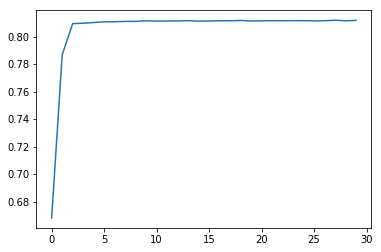

In [17]:
plt.plot(history.history['acc'])
plt.show()

In [18]:
model.get_weights()

[array([[ 1.73937678e-02, -1.86125675e-04,  7.73838982e-02,
         -1.90006429e-03, -3.36666107e-01, -1.05852775e-01,
         -6.20219111e-02, -6.07058406e-04],
        [-1.50690660e-01, -9.50931339e-04, -5.03976233e-02,
          1.57531560e-03,  2.10993690e-03, -1.61386852e-03,
          1.18291986e+00, -2.16312660e-03],
        [ 2.02184950e-04, -7.80231971e-03,  3.56735677e-01,
          1.10676698e-03, -2.23516494e-01, -8.88700411e-03,
         -4.00233299e-01, -1.46459381e-03],
        [ 6.81368820e-03,  1.61387976e-02,  2.04745159e-02,
          1.00857497e-03,  1.08549101e-02,  1.80709851e-03,
         -7.34729087e-03,  1.74326691e-04],
        [-4.78795683e-03,  3.25331697e-03, -3.49942665e-03,
         -6.99577294e-03,  2.59748776e-03, -1.29844258e-02,
         -8.53365636e-04,  2.73583294e-03],
        [ 5.20045683e-03,  8.14419240e-04, -2.18191534e-01,
         -1.14186294e-03,  9.08027287e-04,  7.36432195e-01,
          1.23163871e-01,  4.84242628e-04],
        [ 2.9455

In [19]:
predict = model.predict(standardised_X, verbose=1)

NameError: name 'standardised_X' is not defined

In [110]:
# print(predict)

for prediction in predict:
    count = 0
    if(prediction[1] != 1):
        count+=1
        print(prediction)
print(count)


[2.3213750e-06 5.4893446e-01 1.0114802e-02 3.4869710e-01 4.6797957e-02]
[4.5394838e-08 5.3241771e-01 8.5697602e-03 3.3341649e-01 8.4114313e-02]
[2.1833756e-08 6.4696121e-01 1.7261162e-02 4.1439354e-01 6.0921431e-02]
[1.3927251e-05 2.4890934e-01 7.7707102e-03 1.4408726e-01 3.0997500e-02]
[7.0733236e-05 2.1002759e-01 7.4828253e-03 1.2855840e-01 1.7108403e-02]
[1.9212321e-09 6.7557532e-01 2.2359021e-02 4.3800843e-01 5.9875958e-02]
[1.3012072e-11 7.1404558e-01 3.0135270e-02 4.7178292e-01 4.8140135e-02]
[2.7673988e-08 5.7893473e-01 1.8275876e-02 3.7717319e-01 3.7850309e-02]
[2.6988005e-06 5.3816426e-01 1.0041987e-02 3.4303898e-01 4.4025011e-02]
[6.59800961e-08 6.43589497e-01 1.44248875e-02 4.08480555e-01
 6.56188950e-02]
[8.2414795e-07 5.9165782e-01 1.1250516e-02 3.7345704e-01 5.7475183e-02]
[6.7248041e-13 6.2328917e-01 2.7748963e-02 4.1457725e-01 3.0212792e-02]
[6.3884120e-09 6.1507064e-01 2.1350507e-02 4.0065077e-01 4.2727932e-02]
[2.0576476e-07 5.5902243e-01 1.4223937e-02 3.6111799e-01 3

[1.6624923e-05 3.0469319e-01 8.3530135e-03 1.7690200e-01 3.4218803e-02]
[2.1460760e-08 6.4709747e-01 1.7289957e-02 4.1451496e-01 6.0878985e-02]
[9.3496759e-08 5.9792131e-01 1.1067217e-02 3.7693185e-01 7.5311176e-02]
[3.4099559e-16 3.8019434e-01 1.3483440e-02 3.0683067e-01 1.2394849e-01]
[3.6690381e-07 6.0992837e-01 1.2045712e-02 3.8016605e-01 6.8930127e-02]
[2.6281850e-11 6.7381245e-01 2.7659452e-02 4.4264340e-01 5.9058759e-02]
[8.9446430e-06 3.5483962e-01 6.1192252e-03 2.0538832e-01 4.0598296e-02]
[1.0989454e-07 6.1288786e-01 1.4219177e-02 3.9040685e-01 5.5104505e-02]
[8.8987287e-13 6.7272681e-01 2.9459374e-02 4.4460878e-01 5.6245320e-02]
[0.04511382 0.00308144 0.06084954 0.01006164 0.00017042]
[1.34780237e-07 6.19059265e-01 1.20075205e-02 3.90326619e-01
 7.06055462e-02]
[2.9942106e-07 6.0578769e-01 1.0503717e-02 3.8001516e-01 7.3175810e-02]
[5.8693257e-07 6.2328607e-01 1.1098636e-02 3.9080626e-01 6.9611534e-02]
[2.8579962e-05 4.7823498e-01 6.8867635e-03 2.8431761e-01 4.3210294e-02]
[

[1.7470273e-06 4.7144726e-01 7.0724194e-03 2.8156301e-01 6.5591000e-02]
[5.7267884e-12 6.9500035e-01 3.0931132e-02 4.5944613e-01 5.3005628e-02]
[2.1565867e-04 3.0607864e-01 4.8734196e-03 1.8729202e-01 1.5754135e-02]
[1.7526410e-06 4.2245981e-01 9.7322250e-03 2.4606107e-01 6.4002961e-02]
[5.2208404e-19 5.5775744e-01 1.4662553e-02 3.7042907e-01 5.5944052e-02]
[5.8584224e-05 1.5908290e-01 6.6227447e-03 9.5292471e-02 1.8407911e-02]
[8.3440788e-10 6.2222958e-01 1.8287644e-02 4.0173051e-01 7.1620189e-02]
[6.7809873e-05 2.0437425e-01 3.3285997e-03 1.2335933e-01 1.7254950e-02]
[0.00030254 0.11998741 0.00616983 0.07717263 0.00987192]
[0.00092508 0.16660886 0.0013743  0.11283422 0.00651016]
[3.6765403e-05 2.4795869e-01 7.8239059e-03 1.4731610e-01 2.3665771e-02]
[0.00020772 0.10676943 0.00580892 0.06696443 0.01182824]
[4.8580698e-18 5.7956821e-01 1.6131654e-02 3.8320312e-01 5.4901343e-02]
[1.05935605e-07 5.52349925e-01 1.57248992e-02 3.59781742e-01
 3.56634445e-02]
[3.6577640e-07 4.6288779e-01 1.

[1.0994955e-17 5.8922327e-01 1.6579878e-02 3.8878107e-01 5.3934205e-02]
[5.3771327e-08 5.1011688e-01 8.2348054e-03 3.1733307e-01 8.4417045e-02]
[4.7537455e-05 2.2487928e-01 7.5180526e-03 1.3382071e-01 2.1689475e-02]
[7.6096578e-09 6.4250028e-01 2.0094009e-02 4.1519302e-01 5.3296596e-02]
[0.05393963 0.00390218 0.06490137 0.01089475 0.00017369]
[6.0344519e-07 5.4374504e-01 1.2488194e-02 3.5040694e-01 3.9726987e-02]
[3.3872885e-07 5.6654626e-01 1.3141787e-02 3.6337817e-01 4.4150218e-02]
[1.1247995e-05 5.6015658e-01 7.9026883e-03 3.4644783e-01 5.8580521e-02]
[1.3606137e-11 7.1381098e-01 3.0283462e-02 4.7168717e-01 4.8337005e-02]
[5.3082669e-08 6.3530588e-01 1.5249804e-02 4.0480605e-01 6.0594607e-02]
[3.0678957e-09 6.6673028e-01 2.1620488e-02 4.3162599e-01 5.8611479e-02]
[0.00022185 0.09070508 0.00554385 0.05803259 0.01053043]
[5.8096384e-06 4.1163838e-01 9.5336502e-03 2.4155588e-01 5.1036276e-02]
[0.00566434 0.04579961 0.00019207 0.04165434 0.00140041]
[2.7997805e-05 2.2598799e-01 7.458351

[4.2394383e-16 6.2648582e-01 1.9160584e-02 4.1145977e-01 5.1444322e-02]
[1.5325653e-05 5.4179949e-01 7.3625837e-03 3.2829261e-01 5.5777118e-02]
[3.1358159e-18 5.1826435e-01 2.0144755e-02 3.5375905e-01 7.7769078e-02]
[1.7695662e-18 5.7571447e-01 1.5058187e-02 3.8029444e-01 5.3358246e-02]
[2.8320180e-10 6.9095135e-01 2.5665008e-02 4.5153466e-01 5.5445679e-02]
[3.6684989e-07 6.0711920e-01 1.2124081e-02 3.8366178e-01 5.9277590e-02]
[2.8654728e-17 5.9934306e-01 1.7204583e-02 3.9480114e-01 5.3193830e-02]
[0.01420421 0.01754688 0.00133418 0.01580822 0.00148316]
[2.0418143e-11 6.2580562e-01 2.1757025e-02 4.0854973e-01 6.8766691e-02]
[4.6354624e-05 3.6337948e-01 5.9957756e-03 2.0761855e-01 3.3708990e-02]
[2.85446636e-16 4.00865197e-01 1.54681355e-02 3.15135002e-01
 1.19591348e-01]
[0.00070627 0.08209003 0.00542949 0.05472631 0.0073684 ]
[2.9722684e-14 6.6739541e-01 2.2727128e-02 4.3798405e-01 4.8888955e-02]
[1.6077709e-17 5.7139403e-01 1.8482488e-02 3.8045606e-01 6.1425701e-02]
[0.00026082 0.17

[2.6142232e-05 2.5921112e-01 7.8062839e-03 1.5012513e-01 2.9379044e-02]
[1.7772725e-06 5.6018877e-01 1.0351583e-02 3.5501036e-01 4.9371082e-02]
[1.4374746e-16 5.6814432e-01 2.2533428e-02 3.8112396e-01 7.0102885e-02]
[6.2096987e-08 4.6798548e-01 3.6433671e-02 3.3190653e-01 2.0789953e-02]
[5.3182697e-07 5.1120704e-01 1.1461360e-02 3.0541560e-01 6.8135545e-02]
[0.00035036 0.05444535 0.00481126 0.03733737 0.00715224]
[7.4877977e-12 6.9881064e-01 2.9509641e-02 4.6139598e-01 4.3594934e-02]
[4.6718057e-08 6.4706802e-01 1.5373886e-02 4.1188428e-01 6.5404005e-02]
[1.3638969e-06 5.7141095e-01 1.0586255e-02 3.6137632e-01 5.2097484e-02]
[2.6109245e-07 5.7886529e-01 8.8998945e-03 3.6220053e-01 7.8233004e-02]
[7.9805986e-06 1.8482186e-01 7.1320506e-03 1.0867196e-01 2.6829567e-02]
[8.8900888e-06 1.5596311e-01 6.7695943e-03 9.3056574e-02 2.3478100e-02]
[1.7932779e-08 6.4791805e-01 1.7704353e-02 4.1554177e-01 6.0221318e-02]
[1.7870519e-06 5.2552211e-01 1.0616188e-02 3.1757036e-01 6.9386259e-02]
[1.1163

[8.6005948e-06 5.7098562e-01 7.5752805e-03 3.4759140e-01 6.8044186e-02]
[8.5341767e-08 6.3231486e-01 1.3550072e-02 3.9829552e-01 6.5386951e-02]
[2.6760571e-07 5.8922178e-01 1.2967841e-02 3.7530395e-01 5.0590049e-02]
[5.0554256e-08 6.0525918e-01 1.6252231e-02 3.8902617e-01 4.8529450e-02]
[1.4905879e-05 1.7250849e-01 6.9226162e-03 1.0218342e-01 2.3478089e-02]
[6.1508423e-08 6.4212906e-01 1.5067589e-02 4.0845481e-01 6.4817712e-02]
[1.9568802e-07 6.1375606e-01 1.2681829e-02 3.8308036e-01 6.7306913e-02]
[0.0001172  0.11196863 0.00593614 0.06971367 0.01320485]
[9.8662531e-06 5.8210701e-01 7.6646232e-03 3.5715276e-01 6.7596234e-02]
[0.00139692 0.1330826  0.00090291 0.09351124 0.00516063]
[3.6043257e-01 7.8907935e-03 7.0252107e-04 1.5589860e-02 1.4782493e-04]
[3.3556393e-14 5.6856501e-01 2.6856892e-02 3.8205788e-01 8.3803229e-02]
[1.4113356e-10 6.5097690e-01 2.4531575e-02 4.2519054e-01 6.6110164e-02]
[1.3713915e-16 6.1163819e-01 1.8605836e-02 4.0263531e-01 5.3372543e-02]
[1.6495832e-06 5.30515

[4.6594266e-08 6.3446289e-01 1.4254873e-02 3.9992234e-01 6.3898534e-02]
[2.5129839e-06 3.7206960e-01 9.1975778e-03 2.1475674e-01 5.4276608e-02]
[9.8160157e-08 3.9427206e-01 6.0741967e-03 2.4889696e-01 8.5102499e-02]
[8.1495060e-08 5.8347017e-01 1.5653610e-02 3.7622783e-01 4.3416601e-02]
[9.9638328e-07 4.5465931e-01 1.0302756e-02 2.6676086e-01 6.8008877e-02]
[0.01456869 0.03552132 0.00011096 0.03527255 0.00087407]
[0.00698467 0.04084168 0.00016086 0.03836218 0.00119775]
[1.4708324e-14 6.0685819e-01 2.8127648e-02 4.0508533e-01 6.9984287e-02]
[4.7352675e-08 5.8176494e-01 1.0747511e-02 3.6768469e-01 7.9183824e-02]
[5.2289293e-09 6.4603472e-01 2.0689102e-02 4.1804111e-01 5.2653622e-02]
[0.0011864  0.14289296 0.00103036 0.09873962 0.00571847]
[1.07068326e-10 7.00465024e-01 3.16903740e-02 4.62295443e-01
 5.54490723e-02]
[2.0578918e-14 6.6095632e-01 2.2708062e-02 4.3402165e-01 5.0113361e-02]
[0.00110647 0.09615041 0.00067748 0.07083468 0.00421494]
[3.4323890e-09 6.6987342e-01 1.9988431e-02 4.3

[2.1285534e-02 3.2806896e-02 9.0693713e-05 3.3588383e-02 7.3674758e-04]
[1.76336783e-07 5.49858868e-01 1.46959955e-02 3.57033700e-01
 3.68157253e-02]
[2.1641558e-14 6.4273292e-01 2.3533635e-02 4.2358762e-01 4.7189258e-02]
[9.2921742e-05 1.9694838e-01 7.3710396e-03 1.2244553e-01 1.4810650e-02]
[3.8297959e-15 6.2324297e-01 2.3390919e-02 4.1208646e-01 5.8882426e-02]
[2.3392011e-05 4.7410139e-01 7.7644479e-03 2.9836285e-01 3.4109149e-02]
[4.7459145e-07 6.2504774e-01 1.1413829e-02 3.9242530e-01 6.9121502e-02]
[5.4978749e-10 6.5185690e-01 1.9286798e-02 4.2083123e-01 6.2466759e-02]
[5.6927660e-16 6.2959331e-01 1.9371562e-02 4.1339076e-01 5.1195432e-02]
[8.8264780e-05 1.7515446e-01 2.5272570e-03 1.0942224e-01 1.3642570e-02]
[4.4719595e-06 5.1962769e-01 9.6300589e-03 3.2924840e-01 4.2282093e-02]
[4.8504649e-08 6.3577563e-01 1.4239712e-02 4.0365314e-01 6.7430973e-02]
[4.1280167e-05 1.4914042e-01 6.5373969e-03 8.9785174e-02 1.8476104e-02]
[1.2692159e-04 2.6819733e-01 4.2426670e-03 1.5608932e-01 2

[4.2550071e-04 5.8329165e-06 3.0662120e-12 1.4255511e-03 1.0807877e-05]
[0.00028891 0.06054477 0.00495904 0.0408872  0.00784879]
[3.7290531e-06 5.2738565e-01 7.3679416e-03 3.1737143e-01 6.8186879e-02]
[1.9761707e-07 5.4112285e-01 1.4386000e-02 3.5213003e-01 3.4891732e-02]
[1.3584657e-04 2.7466780e-07 1.2160452e-12 5.2142428e-04 7.6437527e-06]
[1.7514823e-16 6.1894333e-01 1.8391052e-02 4.0663013e-01 5.1584441e-02]
[0.00020348 0.07333148 0.00524264 0.04820411 0.00929749]
[2.2892538e-04 1.0590545e-06 1.8744344e-12 8.1372476e-04 8.9259638e-06]
[4.9847758e-01 7.3572813e-04 1.4985426e-08 7.4309786e-03 2.3365325e-05]
[2.2041433e-18 5.6994033e-01 1.5724611e-02 3.7772533e-01 5.5931058e-02]
[2.3016873e-04 7.7149639e-07 1.9660397e-12 7.3378574e-04 8.6412665e-06]
[1.0539330e-14 6.5709144e-01 2.1854565e-02 4.3118608e-01 4.9677432e-02]
[1.9870019e-04 6.1613099e-07 1.7072292e-12 6.8112439e-04 8.4090198e-06]
[6.86882995e-04 1.87348196e-05 4.57353383e-12 2.09187251e-03
 1.23340205e-05]
[0.08379466 0.00

[2.3023264e-14 6.3686448e-01 2.3680585e-02 4.2023978e-01 4.4949420e-02]
[1.3604099e-05 5.3962553e-01 7.2954427e-03 3.2400683e-01 5.9732694e-02]
[1.6422813e-07 5.9947157e-01 1.3927398e-02 3.8240075e-01 5.2112348e-02]
[2.8059434e-04 1.5930869e-06 2.2457932e-12 9.3080016e-04 9.3542549e-06]
[9.0537128e-07 6.1462969e-01 1.0086934e-02 3.8393015e-01 7.0939235e-02]
[1.1827900e-04 1.2704189e-07 1.1518974e-12 4.0528859e-04 7.0481547e-06]
[0.02199046 0.01489824 0.00109236 0.01400692 0.00118529]
[4.7441950e-04 7.1833906e-06 3.3810134e-12 1.5266067e-03 1.1068524e-05]
[2.0652006e-15 5.8325875e-01 2.6419595e-02 3.9124039e-01 7.3243663e-02]
[2.5163629e-09 6.5854716e-01 2.2481656e-02 4.2749393e-01 5.4006536e-02]
[5.242578e-07 6.054060e-01 1.156416e-02 3.816729e-01 6.056982e-02]
[1.2961752e-09 6.7887712e-01 2.3187483e-02 4.4099784e-01 5.9068900e-02]
[1.1437586e-06 3.8069317e-01 9.3767736e-03 2.1957056e-01 6.1383989e-02]
[1.4461591e-06 9.8024122e-02 1.8484136e-03 8.2081348e-02 2.7450232e-02]
[1.0452065e-

[0.0007001  0.17874704 0.00158348 0.11747921 0.007964  ]
[6.8252837e-07 6.1930239e-01 1.0575248e-02 3.8757735e-01 7.0044205e-02]
[4.4075161e-04 5.0412032e-06 3.2489222e-12 1.3591679e-03 1.0648703e-05]
[1.4671131e-12 6.4201820e-01 2.9176874e-02 4.2479655e-01 6.6256598e-02]
[1.9107157e-08 6.1177140e-01 1.8114226e-02 3.9517376e-01 4.6213225e-02]
[3.2475850e-19 5.4736668e-01 1.4719662e-02 3.6503577e-01 5.8160543e-02]
[2.5844058e-01 1.0428891e-03 2.9156059e-05 7.7595450e-03 5.7847265e-05]
[6.3015470e-12 5.9084547e-01 1.9896630e-02 3.8712847e-01 7.6697260e-02]
[3.5927878e-05 1.4163110e-01 6.4493464e-03 8.5657522e-02 1.8168526e-02]
[1.1939376e-09 6.7802095e-01 2.4657864e-02 4.4165078e-01 5.8689337e-02]
[6.9091667e-13 6.2064576e-01 2.7823972e-02 4.1310674e-01 2.9558411e-02]
[6.5001007e-04 1.5622349e-05 4.3964121e-12 1.9709603e-03 1.2089327e-05]
[2.7401856e-04 1.8439442e-06 2.1416842e-12 9.7604486e-04 9.4875622e-06]
[1.2722592e-13 6.7287040e-01 2.5022333e-02 4.4260773e-01 5.0790321e-02]
[4.6915

[0.04104008 0.00393261 0.12880762 0.01081434 0.00019261]
[2.6871126e-06 5.4438710e-01 1.0085849e-02 3.4324050e-01 5.0159231e-02]
[0.00046257 0.06946243 0.00510472 0.04611208 0.00801934]
[1.6748048e-07 2.4823166e-01 4.0738680e-03 1.7040844e-01 6.4541839e-02]
[1.0381008e-03 4.5920060e-05 6.5465753e-12 2.8086167e-03 1.3664639e-05]
[5.7011894e-06 3.9166197e-01 9.2649581e-03 2.2729462e-01 5.1019184e-02]
[3.0255719e-06 2.8602377e-01 8.3278557e-03 1.6429356e-01 4.2416573e-02]
[1.6180480e-04 3.4965294e-07 1.4480528e-12 5.6518789e-04 7.8842986e-06]
[2.5894309e-05 2.0962930e-01 7.2873281e-03 1.2261785e-01 2.5052538e-02]
[4.6905517e-04 5.6535546e-06 3.4560399e-12 1.4125818e-03 1.0811465e-05]
[1.06707106e-04 1.41176429e-07 1.00244975e-12 4.18821815e-04
 7.08953303e-06]
[2.1997708e-04 1.0390967e-06 1.7923817e-12 8.0833200e-04 8.8952020e-06]
[2.2886990e-08 5.7001466e-01 1.8973341e-02 3.7319973e-01 3.4847960e-02]
[2.0702698e-06 4.9830714e-01 1.0519522e-02 2.9718977e-01 7.2157621e-02]
[1.0113949e-03 5

[2.7345170e-04 1.5766907e-06 2.1833837e-12 9.2753873e-04 9.3384069e-06]
[1.7224337e-17 5.9743887e-01 1.6617846e-02 3.9332256e-01 5.2430939e-02]
[8.9953514e-04 4.3039036e-05 5.5856305e-12 2.7467727e-03 1.3514875e-05]
[1.0020475e-05 2.0839602e-01 7.3787686e-03 1.2160186e-01 2.8374905e-02]
[3.2815006e-02 3.3177122e-02 8.0046855e-05 3.4465335e-02 6.5577443e-04]
[1.0259610e-06 5.8092052e-01 1.1055011e-02 3.6729431e-01 5.4369599e-02]
[1.7017623e-05 4.9237311e-01 8.0793798e-03 3.1184939e-01 3.7888482e-02]
[8.0307262e-05 4.0596491e-01 6.5478296e-03 2.4597314e-01 2.5000008e-02]
[1.5472132e-04 3.7111758e-07 1.3664700e-12 5.7628646e-04 7.9293604e-06]
[3.8152572e-04 4.7197273e-06 2.7672034e-12 1.3285455e-03 1.0527112e-05]
[0.00091942 0.07813726 0.000572   0.05995098 0.00360921]
[0.00172365 0.03820514 0.00428397 0.02770381 0.00460211]
[8.2296605e-04 3.2731812e-05 5.2365464e-12 2.5118315e-03 1.3120500e-05]
[0.00159844 0.06977657 0.00043635 0.05558382 0.00284581]
[6.2528631e-09 6.4520258e-01 2.021095

[0.03889167 0.00254644 0.05800182 0.00944215 0.00016819]
[1.4352170e-04 2.2903565e-01 3.3614777e-03 1.3628186e-01 1.6995680e-02]
[1.3224118e-04 1.8353637e-07 1.2498767e-12 4.5742907e-04 7.3442284e-06]
[1.6447126e-04 3.2411896e-07 1.4891030e-12 5.5136159e-04 7.8249877e-06]
[0.00300974 0.09915795 0.00052532 0.07599411 0.00309665]
[1.5827874e-04 2.5082690e-07 1.4715833e-12 5.0686754e-04 7.6103374e-06]
[3.0880818e-07 5.9840167e-01 1.2546740e-02 3.7960157e-01 5.4763757e-02]
[3.4022254e-05 1.2893189e-01 6.2866393e-03 7.8725465e-02 1.7182916e-02]
[3.5436352e-04 2.8539525e-06 2.7268804e-12 1.1276917e-03 9.9945355e-06]
[2.0512400e-06 5.4948461e-01 1.0288874e-02 3.4933746e-01 4.6427600e-02]
[0.00159044 0.10246094 0.00064316 0.0753942  0.00407665]
[3.1515319e-06 5.6740320e-01 9.4615277e-03 3.5687301e-01 5.4856986e-02]
[7.5896730e-04 2.1232296e-05 5.0535648e-12 2.1806383e-03 1.2529996e-05]
[2.4469336e-04 7.9691750e-07 2.1077404e-12 7.4223295e-04 8.6937716e-06]
[3.1047323e-06 2.8293899e-01 8.293594

 7.06541050e-06]
[1.4310880e-05 1.9746850e-01 7.2206939e-03 1.1575801e-01 2.6004404e-02]
[7.0844319e-10 6.7350560e-01 2.1327963e-02 4.3626082e-01 5.8220442e-02]
[1.1504949e-04 3.8469964e-01 6.3438672e-03 2.3616648e-01 2.0056225e-02]
[1.6809748e-17 5.4630297e-01 2.0631136e-02 3.6850935e-01 7.1678370e-02]
[5.3858824e-14 6.5815002e-01 2.4286309e-02 4.3319866e-01 4.8873238e-02]
[2.8187240e-05 1.5984277e-01 6.7046504e-03 9.5494010e-02 2.0410165e-02]
[8.4328444e-10 6.8268466e-01 2.4525302e-02 4.4471145e-01 5.8462556e-02]
[4.9038186e-07 5.8627850e-01 1.1968156e-02 3.7196407e-01 5.2494343e-02]
[0.00041773 0.09901943 0.00571728 0.06390178 0.00929854]
[4.0351711e-06 4.6840569e-01 9.9051455e-03 2.8160632e-01 5.5056766e-02]
[5.6499608e-05 3.0637750e-01 5.6174202e-03 1.7432944e-01 2.8326154e-02]
[2.7985523e-06 2.9533100e-01 8.4258355e-03 1.6955633e-01 4.3960456e-02]
[3.3399544e-08 6.1510217e-01 1.3139894e-02 3.9018014e-01 7.1914509e-02]
[1.4030607e-05 5.4760933e-01 7.6841488e-03 3.3650261e-01 5.454

[0.00197715 0.04051391 0.00434254 0.02914235 0.00468322]
[8.9806944e-09 6.6184372e-01 1.8526534e-02 4.2513597e-01 6.2365197e-02]
[1.1041180e-04 1.5495471e-07 1.0289072e-12 4.3176956e-04 7.1608806e-06]
[7.4763193e-06 5.9265059e-01 8.1210090e-03 3.6702457e-01 7.1076691e-02]
[2.6484623e-04 1.6806399e-06 2.0872492e-12 9.4695162e-04 9.3943227e-06]
[9.0403488e-16 6.1734033e-01 2.1267105e-02 4.0752363e-01 5.6751762e-02]
[0.00022047 0.10345083 0.00575155 0.06513654 0.01148821]
[7.84318370e-04 2.95600821e-05 5.02099447e-12 2.42914655e-03
 1.29697455e-05]
[3.3889705e-04 3.0260915e-06 2.5702168e-12 1.1491720e-03 1.0044567e-05]
[4.4102663e-10 6.8817282e-01 2.6276875e-02 4.4990286e-01 5.7313912e-02]
[1.5253637e-06 5.5103332e-01 1.0693183e-02 3.5095274e-01 4.5611501e-02]
[5.1214123e-08 6.4470041e-01 1.5141042e-02 4.1016132e-01 6.4757809e-02]
[1.8135302e-16 5.8951038e-01 2.0973580e-02 3.9181569e-01 6.2232055e-02]
[1.2318837e-04 1.9181050e-07 1.1412733e-12 4.6362710e-04 7.3552319e-06]
[7.7209814e-04 2

[6.2218245e-02 3.1286979e-06 2.5389109e-09 1.2241546e-03 1.3162308e-05]
[1.5166626e-02 1.6271422e-05 1.8509738e-10 2.0673689e-03 1.3697884e-05]
[2.1726255e-01 2.9963070e-05 1.2623496e-08 2.5871277e-03 1.7810728e-05]
[1.8403578e-01 1.3603210e-03 1.6692840e-04 8.2910890e-03 7.4029071e-05]
[2.89068937e-01 2.21951958e-03 1.15479146e-04 9.83437710e-03
 7.16823852e-05]
[2.5983855e-01 3.3501172e-04 1.9927693e-06 5.4767705e-03 3.8569007e-05]
[8.3201323e-03 6.2836327e-05 7.4578697e-11 3.1830780e-03 1.5288415e-05]
[4.19188738e-01 9.63716666e-05 1.36600615e-08 3.83671839e-03
 1.88883296e-05]
[0.16304578 0.00833672 0.00760336 0.01292888 0.00048389]
[9.1753364e-02 5.3886988e-04 1.5084978e-04 6.0637179e-03 7.0529015e-05]
[2.3617640e-02 8.2919825e-05 2.5120697e-10 3.5229011e-03 1.6361095e-05]
[3.7102681e-01 2.7807392e-04 3.3730211e-07 5.2694334e-03 3.0127794e-05]
[7.3286992e-01 1.1123498e-03 4.7009358e-08 8.5857455e-03 2.5301553e-05]
[2.0730726e-01 1.0155167e-03 5.7440211e-05 7.6183798e-03 6.3351661e

[1.3577542e-01 4.0940233e-04 2.5310215e-05 5.6632804e-03 5.4860961e-05]
[2.8624587e-02 1.6373130e-04 2.2186821e-04 4.0217177e-03 7.1006943e-05]
[0.22493888 0.00733363 0.00412268 0.01305798 0.00027489]
[1.04504816e-01 2.90759253e-05 1.10557842e-07 2.48208060e-03
 2.38079356e-05]
[3.7142197e-03 2.9754992e-06 4.3964981e-11 1.1730001e-03 1.0983373e-05]
[5.1426963e-04 2.0323142e-07 6.1288140e-12 4.7963203e-04 7.8024686e-06]
[3.8199238e-02 9.1898495e-05 2.6495141e-05 3.4038303e-03 5.2140371e-05]
[8.0571449e-01 1.2744148e-03 7.8570750e-08 9.0094423e-03 2.6172738e-05]
[8.1681170e-02 5.1475045e-06 3.8448706e-09 1.4413148e-03 1.4162511e-05]
[0.1195744  0.00948726 0.00383533 0.01329825 0.00054449]
[3.76373261e-01 7.57525486e-05 1.14586705e-08 3.54313641e-03
 1.83356860e-05]
[5.5644643e-02 1.0102632e-04 7.0158124e-10 3.7930284e-03 1.7270364e-05]
[0.0256029  0.00153254 0.05381885 0.00795712 0.00016327]
[6.1461782e-01 4.1618315e-04 6.6670047e-08 6.1819358e-03 2.4575800e-05]
[8.7940402e-02 4.9354494e

[7.6929611e-01 3.0948427e-03 1.1519420e-07 1.2066154e-02 2.6936656e-05]
[0.09104767 0.00286009 0.00771309 0.01011471 0.00012793]
[4.7263288e-01 6.7603406e-03 2.0563767e-04 1.4128636e-02 8.6878747e-05]
[2.6696706e-01 4.0474199e-03 6.3049881e-04 1.1774758e-02 9.2209506e-05]
[4.6618176e-01 6.6125230e-03 2.1016646e-04 1.4110973e-02 8.1257931e-05]
[5.7079881e-01 8.5012810e-03 8.1848166e-06 1.5717041e-02 6.0698214e-05]
[2.1400393e-03 7.3557721e-06 2.0099863e-11 1.5641490e-03 1.1756604e-05]
[1.7999417e-01 5.4724218e-04 2.1146112e-05 6.2625832e-03 5.4082415e-05]
[8.7302156e-02 1.4721823e-04 8.2923289e-06 4.0599909e-03 4.5349494e-05]
[8.6390257e-02 3.1704712e-05 2.3312911e-07 2.5299271e-03 2.6415264e-05]
[1.2960090e-01 1.1943882e-05 2.8407188e-09 1.9173039e-03 1.4494905e-05]
[2.0964211e-02 7.2261297e-05 2.2148312e-10 3.3642694e-03 1.6059772e-05]
[3.8829751e-02 3.2925163e-05 5.2591831e-10 2.6266575e-03 1.5242354e-05]
[0.1854959  0.00904528 0.00135541 0.01366823 0.00034747]
[2.5777027e-01 1.06524

[0.08939944 0.00514023 0.03147991 0.01208214 0.00016081]
[3.51148099e-01 3.79048497e-03 1.94613734e-04 1.17034735e-02
 7.84583899e-05]
[4.9962075e-03 6.7002096e-05 4.0176595e-11 3.2309841e-03 1.5078461e-05]
[0.02406039 0.00197504 0.10848481 0.00858111 0.00018267]
[2.82868087e-01 1.07987495e-02 9.10487597e-06 1.58624873e-02
 1.14126087e-04]
[4.8955629e-04 2.2486904e-06 4.1372929e-12 1.0475179e-03 9.8879173e-06]
[0.06189333 0.00114752 0.00267131 0.0075265  0.00010689]
[6.2942374e-01 8.2494523e-03 5.5479654e-06 1.5858365e-02 4.9801514e-05]
[1.6447982e-02 6.1538917e-06 2.3465271e-10 1.5098267e-03 1.2497703e-05]
[1.2537573e-01 8.5664442e-06 2.8378484e-09 1.7197710e-03 1.3993379e-05]
[2.4169779e-01 7.8391819e-04 5.2500653e-09 7.5141937e-03 2.2118202e-05]
[1.4635069e-02 6.0597173e-05 1.4725589e-10 3.1651575e-03 1.5567513e-05]
[8.5544353e-03 3.0153228e-06 1.1850367e-10 1.1889176e-03 1.1354779e-05]
[2.3405701e-03 5.8281759e-05 1.6625338e-11 3.0621793e-03 1.4441040e-05]
[5.99402636e-02 1.1311447

[1.2376587e-03 6.5828572e-06 1.0657319e-11 1.4995693e-03 1.1383512e-05]
[5.7309739e-02 2.9776652e-06 2.8331433e-09 1.2017837e-03 1.3333115e-05]
[2.3445794e-02 8.5229949e-06 3.4258402e-10 1.6838297e-03 1.3065112e-05]
[4.0796369e-01 7.5432095e-03 4.4938613e-04 1.3908741e-02 1.5542620e-04]
[6.7399152e-02 4.8694628e-06 1.3648700e-09 1.4207345e-03 1.2888345e-05]
[4.5555896e-01 9.4112381e-03 8.9450177e-06 1.5804678e-02 8.0742109e-05]
[2.3775443e-01 6.8010581e-03 2.9791978e-03 1.3122494e-02 1.9556166e-04]
[5.3062445e-01 3.3034635e-04 9.4235460e-08 5.6879022e-03 2.5532014e-05]
[8.9027636e-02 9.1522261e-06 1.1588921e-08 1.7281990e-03 1.6822109e-05]
[3.4723797e-01 1.0099216e-02 1.4759376e-05 1.5661001e-02 1.1298738e-04]
[5.6436259e-01 2.6051956e-04 3.8049741e-08 5.3119329e-03 2.2369784e-05]
[4.7851014e-01 6.7507392e-03 1.9287101e-04 1.4163334e-02 8.4650092e-05]
[3.2608935e-01 2.4574872e-03 9.3713541e-05 1.0207801e-02 6.9939495e-05]
[2.9590743e-04 8.7575864e-07 2.6051060e-12 7.6697144e-04 8.84168

[3.5355836e-01 2.5358080e-04 3.2939644e-07 5.1111775e-03 2.9957042e-05]
[2.1232389e-01 6.0420258e-05 7.0600905e-08 3.2066554e-03 2.3065384e-05]
[6.5827245e-01 5.8415416e-04 3.3834521e-08 6.9456594e-03 2.3412789e-05]
[6.6548359e-01 3.0860926e-03 7.5498519e-08 1.2010089e-02 2.6116042e-05]
[6.9139902e-03 1.1953465e-05 7.5412197e-11 1.8538638e-03 1.2882101e-05]
[0.0244835  0.00202184 0.1092359  0.00865079 0.0001831 ]
[7.1443820e-01 6.3179918e-03 3.6453875e-07 1.5129912e-02 3.0784460e-05]
[1.4596924e-01 2.3975126e-05 3.0398843e-09 2.4083492e-03 1.5625223e-05]
[9.2843860e-02 5.1363523e-04 1.3017909e-04 5.9796213e-03 6.9039488e-05]
[5.3807300e-01 9.0217032e-03 5.3805566e-06 1.5977247e-02 6.1969244e-05]
[1.7816944e-01 1.1751947e-04 5.8944391e-07 3.9047252e-03 3.1505759e-05]
[2.0198868e-01 5.7345950e-03 3.6489258e-03 1.2919062e-02 1.1988426e-04]
[2.69283950e-01 7.40533415e-03 2.30632653e-03 1.32686915e-02
 2.39293426e-04]
[2.5250150e-03 8.6099672e-06 2.3913108e-11 1.6489946e-03 1.2012030e-05]
[

[5.8660537e-02 1.1059578e-04 1.2795257e-05 3.6621599e-03 4.7586440e-05]
[1.1735537e-01 1.4034823e-05 1.4307350e-08 1.9925192e-03 1.7571898e-05]
[1.7723009e-01 1.0272225e-03 9.7120683e-05 7.5956290e-03 6.8107795e-05]
[1.5657695e-02 4.5755005e-05 1.6608011e-10 2.8914558e-03 1.5175491e-05]
[5.6505750e-04 3.5747739e-06 4.5918195e-12 1.2194877e-03 1.0402327e-05]
[2.5627557e-02 2.9630974e-04 1.1979452e-03 4.8042345e-03 9.1110654e-05]
[3.1831388e-03 9.6053591e-06 3.0947037e-11 1.7125232e-03 1.2243782e-05]
[9.8401621e-02 5.5037785e-06 2.1873343e-09 1.4852231e-03 1.3255727e-05]
[0.08061271 0.01281744 0.00020372 0.0147979  0.00046958]
[3.8988289e-01 1.0139975e-02 7.3600813e-06 1.5961422e-02 9.2201233e-05]
[1.1331860e-01 3.3156532e-05 2.0544655e-09 2.6660797e-03 1.5941454e-05]
[2.8449108e-04 2.1006697e-07 3.0306571e-12 4.8180169e-04 7.6578344e-06]
[8.8298813e-02 1.2523131e-02 8.0806734e-05 1.4909740e-02 3.3268356e-04]
[0.04057048 0.00387121 0.12821977 0.01075564 0.0001923 ]
[0.04571247 0.00451852

[3.8127876e-03 2.9096203e-05 3.2829416e-11 2.4588490e-03 1.3756978e-05]
[4.7745671e-02 2.5119722e-05 6.9317082e-07 2.3022734e-03 3.0358291e-05]
[2.6273634e-04 1.7303930e-07 2.8389810e-12 4.5209363e-04 7.4944946e-06]
[5.0995010e-04 7.4229019e-06 3.6626565e-12 1.5439594e-03 1.1131572e-05]
[6.7372195e-02 2.8433460e-05 3.6098237e-07 2.4239523e-03 2.7933689e-05]
[7.7111885e-02 1.1957771e-04 1.0354667e-09 4.0209233e-03 1.7792765e-05]
[5.3092182e-01 3.2578135e-04 9.0967731e-08 5.6633661e-03 2.5392777e-05]
[2.2378049e-03 2.3264456e-06 2.4938938e-11 1.0769136e-03 1.0515092e-05]
[2.9581830e-02 1.3661102e-04 3.0741090e-10 4.1508498e-03 1.7330321e-05]
[0.23856767 0.00907169 0.00043491 0.01411249 0.00024614]
[2.5172791e-02 5.1222023e-06 4.0235817e-10 1.4290703e-03 1.2474817e-05]
[3.9596549e-01 6.7912699e-03 4.5710389e-04 1.3817868e-02 1.1181482e-04]
[7.1590120e-01 4.9197879e-03 1.5195154e-06 1.3646112e-02 3.9272036e-05]
[7.3126773e-04 3.7488285e-06 6.1938120e-12 1.2420932e-03 1.0558462e-05]
[1.4299

[4.8632984e-18 1.4632092e-08 6.6554331e-11 3.3317393e-04 8.5614812e-01]
[5.4067947e-15 2.5537203e-08 2.0836109e-11 4.3853835e-04 4.5072263e-01]
[3.0310899e-20 2.3712261e-07 2.0567620e-10 1.1247767e-03 9.4700992e-01]
[2.8590693e-13 5.4238615e-07 3.9397780e-11 1.4526402e-03 1.8469779e-01]
[1.4296531e-18 1.2294258e-06 1.4365306e-10 2.1097180e-03 8.4991384e-01]
[1.8365967e-22 7.4965892e-06 1.5000976e-09 3.7809003e-03 9.1714913e-01]
[1.3680903e-22 5.7769480e-06 3.7425946e-10 3.2975508e-03 8.5757846e-01]
[7.4116101e-23 2.6929481e-08 1.0111806e-10 4.3966810e-04 9.8632592e-01]
[1.1253596e-06 5.4536707e-04 1.7480965e-04 1.7473172e-02 1.1812297e-01]
[3.5931503e-16 7.7508412e-07 7.9601950e-11 1.7629962e-03 5.9585732e-01]
[2.5398060e-21 1.0613568e-06 2.7754413e-10 2.0004830e-03 9.6605664e-01]
[9.5061597e-07 5.7042748e-01 1.1137001e-02 3.5147208e-01 6.6702083e-02]
[5.9417567e-16 4.9060127e-08 4.9066857e-12 5.9284980e-04 4.4153571e-01]
[1.4335639e-17 3.1859090e-06 8.0066943e-12 2.8163011e-03 4.23805

[1.9629305e-15 2.0425870e-05 7.2066096e-11 5.0686933e-03 1.2969710e-01]
[7.89477785e-20 2.50529974e-05 1.07769395e-07 7.11111259e-03
 9.75443482e-01]
[3.0881670e-17 1.3013127e-07 9.1995842e-11 8.8585040e-04 7.6523340e-01]
[1.0777306e-19 9.4608934e-09 2.7786391e-11 2.8109958e-04 9.1781759e-01]
[9.8549885e-14 4.3020430e-07 4.3590572e-11 1.3837537e-03 2.6430175e-01]
[3.6613884e-18 2.0873571e-08 8.5802726e-11 3.8876411e-04 8.6716938e-01]
[3.0831260e-19 1.2788045e-08 3.0813456e-11 3.2090530e-04 8.9775670e-01]
[1.5232974e-19 8.0127660e-07 1.7956206e-10 1.7925296e-03 9.1255915e-01]
[3.0034467e-14 1.8293241e-06 5.1579602e-11 2.3220135e-03 2.6158017e-01]
[6.1570414e-15 1.3049459e-05 4.3996215e-07 5.0794152e-03 7.7240670e-01]
[3.0553605e-15 5.2411330e-08 3.4669420e-11 5.9937732e-04 4.9724320e-01]
[8.8233445e-18 1.2416785e-07 9.9394035e-11 8.6669839e-04 8.1579667e-01]
[5.3531192e-18 3.6107535e-06 3.4987950e-11 3.0649756e-03 6.3923478e-01]
[6.6169132e-12 9.0422884e-07 8.3218472e-09 1.8631109e-03 4

[9.2699890e-18 1.6724169e-07 3.0063702e-10 9.6302055e-04 8.5557586e-01]
[5.2827480e-14 4.2438551e-06 5.0031774e-11 3.0307958e-03 1.8168719e-01]
[0.00638132 0.06376579 0.00025565 0.05417364 0.00183336]
[2.4687990e-16 1.4839873e-07 5.5417507e-12 9.0691302e-04 4.6709794e-01]
[1.1053005e-14 9.3416575e-06 2.4448238e-10 4.4477843e-03 3.7690571e-01]
[5.0281242e-16 1.4089429e-05 3.5643907e-07 5.3354609e-03 8.3413225e-01]
[6.5146256e-12 1.3774300e-04 8.5784040e-06 1.2346644e-02 6.7270839e-01]
[3.9801920e-12 2.3999262e-04 1.0074835e-05 1.5023213e-02 6.9441152e-01]
[2.5500520e-18 8.9459485e-05 1.2254879e-06 1.1636870e-02 9.4317520e-01]
[7.5372321e-07 4.5240718e-01 1.0416829e-02 2.6507881e-01 6.7023225e-02]
[2.1541535e-17 4.0391182e-08 4.4806981e-11 5.3209031e-04 7.6787466e-01]
[6.8670457e-17 4.7643578e-08 4.5064709e-11 5.7253672e-04 7.1512944e-01]
[6.7353256e-18 7.2393038e-07 3.2964322e-11 1.6950599e-03 7.3372477e-01]
[2.3981171e-14 1.1100246e-05 5.6039024e-11 4.2725350e-03 1.8042336e-01]
[2.1292

[7.8410875e-19 3.7485211e-06 6.4347810e-10 3.2875454e-03 8.9888060e-01]
[7.9118292e-12 2.7666983e-05 2.0966538e-06 6.5757642e-03 5.9636915e-01]
[4.9997466e-21 9.1304837e-06 2.6064406e-10 3.9551258e-03 7.2261089e-01]
[2.4917759e-20 8.5409830e-08 3.2391556e-10 7.1396917e-04 9.6077210e-01]
[4.0117228e-12 8.4177409e-06 5.9703001e-07 4.0609473e-03 5.3800410e-01]
[5.4546554e-09 6.2532926e-01 2.1524560e-02 4.0671217e-01 4.5402091e-02]
[8.3777860e-15 1.9595558e-05 6.2408585e-11 4.9118293e-03 1.0164379e-01]
[3.6351271e-18 1.9260065e-06 1.3193566e-10 2.5044088e-03 8.1002736e-01]
[7.35044026e-08 6.01942241e-01 1.15150185e-02 3.79994094e-01
 7.44983926e-02]
[1.5792160e-22 2.6792262e-07 3.5716649e-10 1.1817906e-03 9.8518384e-01]
[1.5725311e-22 8.1770695e-06 1.5220563e-09 3.8761862e-03 9.1021234e-01]
[3.1064589e-16 6.0992625e-06 1.4657601e-07 3.8226603e-03 8.1858313e-01]
[1.23505750e-21 1.02052304e-07 1.86871768e-10 7.87823228e-04
 9.75116014e-01]
[7.42806949e-19 1.08856050e-07 1.12902646e-10 8.1613

[7.2643559e-21 1.4352374e-06 2.5059202e-10 2.2445098e-03 9.5482212e-01]
[2.7309100e-15 7.2071118e-09 1.7171471e-12 2.6449873e-04 3.4377804e-01]
[4.1628222e-15 6.6488269e-06 2.6704755e-10 4.0760450e-03 4.8967576e-01]
[0.00258619 0.11167217 0.00064885 0.08437584 0.00331846]
[1.1114009e-15 2.7395718e-05 7.6651949e-11 5.4352009e-03 9.3446672e-02]
[0.00140336 0.05882261 0.00036787 0.04882275 0.00246686]
[8.5976438e-17 4.6998566e-06 9.7054358e-11 3.5183041e-03 6.3556612e-01]
[1.0215131e-17 1.7952794e-05 1.2144309e-10 5.3109755e-03 3.8320959e-01]
[1.12203675e-17 1.70434632e-05 1.20096474e-10 5.23201982e-03
 3.95355314e-01]
[9.3380724e-16 2.7867852e-08 4.4726185e-12 4.7610907e-04 4.2669711e-01]
[1.4125720e-17 1.4492213e-06 3.1121956e-11 2.2107773e-03 6.7976177e-01]
[1.61949093e-17 1.39058302e-05 1.15842246e-10 4.93576238e-03
 4.45169568e-01]
[1.0617905e-13 3.9276824e-07 4.3151149e-11 1.3394667e-03 2.6452029e-01]
[1.5490891e-24 1.1634654e-06 5.8543553e-10 1.9123809e-03 9.8257107e-01]
[4.4273777

[7.1224949e-20 8.0815063e-08 1.1396908e-10 7.1497343e-04 9.3410629e-01]
[7.5462289e-18 7.6782345e-07 1.1904239e-10 1.7600113e-03 7.9644859e-01]
[2.94434509e-17 1.12957615e-07 2.68135063e-11 8.30742531e-04
 6.98494077e-01]
[4.4204048e-18 4.2441079e-07 5.0539362e-10 1.4257765e-03 8.7884766e-01]
[1.9029222e-15 1.1358812e-08 2.3701987e-12 3.2232740e-04 3.7090430e-01]
[1.9734763e-18 4.5478121e-08 1.4891925e-10 5.4533954e-04 8.8878310e-01]
[2.0056579e-23 3.2664034e-06 4.5294382e-10 2.7064569e-03 9.3203413e-01]
[2.7411250e-17 1.5117303e-07 9.9500255e-11 9.4318966e-04 7.7077693e-01]
[5.3193284e-18 9.7425959e-07 3.4087941e-11 1.8996396e-03 7.3912138e-01]
[3.8744470e-18 1.4519022e-06 3.5648776e-11 2.2137624e-03 7.4625152e-01]
[7.9358806e-18 4.6218497e-01 1.8081358e-02 3.3404863e-01 9.4255053e-02]
[1.8843123e-17 5.2008057e-01 2.3245130e-02 3.5637784e-01 8.4224120e-02]
[8.7277550e-14 6.4559205e-04 1.1140153e-05 2.1814639e-02 8.0245197e-01]
[1.3377405e-21 3.6948468e-06 2.9736069e-10 2.9493116e-03 8

[2.8613970e-18 7.8493489e-05 1.0902493e-06 1.1034694e-02 9.4068938e-01]
[2.4421640e-20 3.1152300e-07 2.1174093e-10 1.2489989e-03 9.4826347e-01]
[8.3679633e-19 4.4614462e-06 4.2162329e-11 3.2027010e-03 6.1913437e-01]
[3.7214555e-20 3.6118891e-08 7.1759952e-11 5.0317583e-04 9.4052780e-01]
[4.6043521e-12 1.4269368e-06 1.1500490e-08 2.2708878e-03 4.3015331e-01]
[1.6368505e-13 1.5630994e-03 1.5895168e-05 2.8307833e-02 7.3816299e-01]
[1.34378775e-11 1.87893068e-06 1.25064243e-08 2.56259600e-03
 3.70876372e-01]
[6.6072305e-15 1.0931011e-05 6.3748215e-11 4.3747076e-03 2.4835713e-01]
[1.1764336e-14 5.7317347e-06 5.8885875e-11 3.4917367e-03 2.5941011e-01]
[2.2753987e-22 1.6913243e-07 2.9826161e-10 9.7973144e-04 9.8398709e-01]
[2.3279558e-21 2.7176984e-06 2.8122685e-10 2.7001628e-03 9.1873682e-01]
[8.2880837e-22 3.3294917e-08 9.4288001e-11 4.8355147e-04 9.7577614e-01]
[2.83004647e-18 2.88785014e-08 1.07976024e-10 4.47667146e-04
 8.76578689e-01]
[2.1443116e-09 6.7506915e-01 2.2821907e-02 4.3799996

[5.5584753e-16 5.3407245e-08 4.9458671e-12 6.1249622e-04 4.4342726e-01]
[3.6658051e-14 1.4344807e-06 5.0183351e-11 2.1288858e-03 2.6212054e-01]
[1.8532692e-22 8.4863379e-09 4.4647109e-11 2.6616329e-04 9.8163247e-01]
[1.7777453e-19 1.4608380e-05 1.8182912e-10 4.7595799e-03 5.2674764e-01]
[4.1965056e-18 1.2314972e-08 2.4068456e-11 3.1661827e-04 8.2130843e-01]
[8.1014906e-16 2.6146945e-05 3.2466832e-10 6.2835035e-03 3.4687269e-01]
[9.7356677e-20 5.1310624e-04 3.4922680e-06 1.8435856e-02 8.1800270e-01]
[5.1666588e-17 1.0650252e-06 6.8863435e-12 1.9324080e-03 5.1297712e-01]
[2.8655397e-16 3.2712020e-08 1.3415367e-11 4.9790804e-04 5.7004124e-01]
[8.1369959e-21 9.4974872e-09 3.4727460e-11 2.8074766e-04 9.5484906e-01]
[4.1661500e-19 3.2213231e-07 5.9692068e-10 1.2763804e-03 9.3001544e-01]
[4.6653655e-20 2.7162132e-08 5.8650924e-11 4.4456022e-04 9.3625218e-01]
[3.3315506e-15 2.5572121e-05 2.8215258e-10 6.1165891e-03 2.8227049e-01]
[4.1341701e-19 1.0352871e-04 1.3027618e-07 1.0667205e-02 8.83640

[0.01689277 0.00126077 0.09703377 0.00738352 0.00017672]
[0.01994308 0.00155566 0.10224897 0.00792175 0.00017946]
[0.04598286 0.00454689 0.13313706 0.01134726 0.00019443]
[0.01281353 0.00086389 0.08506568 0.00649827 0.00016809]
[0.04595103 0.00454169 0.13307308 0.01134234 0.00019439]
[0.02362994 0.00193112 0.10793237 0.0085176  0.00018241]
[0.01329314 0.00091094 0.0869254  0.00661716 0.00016959]
[0.01533856 0.0011149  0.09401876 0.00708418 0.00017502]
[0.04717473 0.00470812 0.1344325  0.01148418 0.00019512]
[0.02194671 0.00176068 0.10564298 0.00826087 0.00018134]
[0.02445738 0.00201811 0.10913508 0.00864459 0.00018303]
[0.01853942 0.00141707 0.0998261  0.00767683 0.00017816]
[0.02136912 0.00169874 0.10453061 0.00815916 0.00018066]
[0.037397   0.00348032 0.12481494 0.01037648 0.00019065]
[0.02285307 0.00185082 0.10680874 0.0083975  0.00018186]
[0.02482426 0.00205768 0.10970138 0.00870178 0.00018334]
[0.04085252 0.0039023  0.12836173 0.01078236 0.00019231]
[0.01686886 0.0012579  0.096937

[0.04703069 0.00468644 0.13422132 0.01146488 0.00019497]
[0.03754315 0.00350194 0.12513486 0.01040048 0.00019086]
[0.02152946 0.00171538 0.10481128 0.00818624 0.00018081]
[0.03122378 0.00275751 0.11784382 0.0095969  0.0001873 ]
[0.04754047 0.00473161 0.13330917 0.01149818 0.00019607]
[0.01513673 0.00109526 0.09351118 0.00704062 0.00017469]
[0.01729596 0.00130041 0.09788127 0.00746218 0.00017724]
[0.04360994 0.00425056 0.13114983 0.01109733 0.00019362]
[0.03717703 0.00345916 0.12479798 0.01035851 0.00019072]
[0.01285616 0.0008686  0.08528054 0.00651189 0.00016827]
[0.02706456 0.0022981  0.11275497 0.00903021 0.00018487]
[0.0160172  0.001177   0.09525786 0.00721323 0.00017567]
[0.03431946 0.00311703 0.12154425 0.01000125 0.00018914]
[0.01439893 0.00102049 0.0909722  0.0068745  0.00017276]
[0.03501483 0.00319917 0.12234772 0.0100891  0.00018952]
[0.01244739 0.00082918 0.0836788  0.00640963 0.00016697]
[0.04761266 0.00473703 0.13301878 0.01150293 0.00019648]
[0.03925922 0.00370712 0.126787

[0.01558666 0.00113813 0.09452801 0.00713384 0.00017533]
[0.0446283  0.00437656 0.13198666 0.01120472 0.00019396]
[0.02139953 0.00170223 0.1046057  0.00816517 0.00018072]
[0.02276535 0.00184045 0.10660105 0.0083804  0.00018169]
[0.04786947 0.00474454 0.13184762 0.0115022  0.00019716]
[0.01759512 0.00132788 0.09832526 0.00751336 0.00017743]
[0.01013164 0.00059947 0.06356843 0.00564499 0.0001513 ]
[0.03787084 0.00353966 0.12539929 0.01043681 0.00019097]
[0.03341739 0.00300945 0.12041903 0.00988251 0.00018855]
[0.02983429 0.00260271 0.11623982 0.0094142  0.00018657]
[0.01501375 0.00108365 0.09319855 0.00701615 0.00017449]
[1.2805706e-05 4.7860077e-01 6.8748998e-03 2.8045601e-01 5.2493397e-02]
[0.04005034 0.00380825 0.12774876 0.0106974  0.00019209]
[0.01221563 0.00080746 0.08279687 0.00635301 0.00016625]
[0.03508851 0.00320969 0.12250584 0.01010141 0.00018963]
[0.0291683  0.00252681 0.11533065 0.00932005 0.00018609]
[0.01011771 0.00059805 0.0634274  0.0056393  0.00015117]
[0.04731112 0.00

[6.7980068e-06 2.7564237e-01 8.1244363e-03 1.5877844e-01 3.6959592e-02]
[0.03912437 0.00368996 0.12662652 0.01058208 0.0001915 ]
[0.01446943 0.00102834 0.09127127 0.00689418 0.00017302]
[0.01116026 0.00070454 0.07410064 0.00603585 0.00015987]
[0.01135873 0.00072351 0.07610548 0.00609774 0.00016132]
[0.02719908 0.00230943 0.11275532 0.00904244 0.00018478]
[0.02875951 0.00247879 0.11467828 0.00925821 0.0001857 ]
[0.01390082 0.00097017 0.08913425 0.00675739 0.00017131]
[0.03376973 0.00305015 0.12080713 0.00992698 0.00018874]
[0.01171127 0.00075895 0.07975874 0.00621402 0.00016396]
[0.04506449 0.00442832 0.13226509 0.01124687 0.00019403]
[0.02521322 0.00209725 0.11014245 0.00875606 0.00018352]
[0.02136764 0.00169799 0.10448447 0.00815737 0.00018062]
[0.00013841 0.06961153 0.00520132 0.04602018 0.00948759]
[0.02855698 0.00245876 0.11454019 0.00923487 0.00018569]
[0.04374353 0.00426553 0.131202   0.01110941 0.00019363]
[0.01324684 0.00090604 0.08672438 0.00660408 0.00016941]
[0.03178942 0.00

[0.01204142 0.0007909  0.08209337 0.00630815 0.00016568]
[0.02049622 0.00161362 0.10334131 0.00802253 0.00018015]
[0.04082409 0.00389771 0.12829529 0.0107775  0.00019226]
[0.04553605 0.00448997 0.1327404  0.01129976 0.00019427]
[0.04737609 0.00472873 0.13409694 0.01150159 0.00019576]
[0.01377365 0.00095771 0.08867761 0.00672844 0.00017096]
[0.01849961 0.00141564 0.09994941 0.00767697 0.00017832]
[0.01346737 0.00092752 0.08754385 0.00665625 0.00017006]
[0.01283278 0.00086602 0.0851616  0.0065044  0.00016817]
[0.01005523 0.00059168 0.06279631 0.00561376 0.00015062]
[0.036085   0.00332111 0.12331802 0.01021341 0.0001899 ]
[0.01812815 0.00138003 0.09934315 0.00761207 0.000178  ]
[0.01463078 0.00104509 0.09188204 0.00693262 0.00017349]
[0.01522356 0.00110493 0.09384558 0.00706368 0.00017497]
[0.03995256 0.00379255 0.1275098  0.01068045 0.00019193]
[0.01547559 0.00112645 0.0941787  0.00710734 0.00017507]
[0.0113915  0.00072634 0.07642658 0.00610601 0.00016153]
[2.3609947e-19 5.5470359e-01 1.

[0.04933983 0.00480407 0.1256179  0.01152326 0.00020217]
[0.04480252 0.00440348 0.13231046 0.01123022 0.00019417]
[0.01922408 0.00148451 0.10103803 0.00779814 0.00017882]
[0.04293072 0.00415615 0.13019985 0.01100944 0.00019307]
[1.0248156e-04 3.5160762e-01 5.9912615e-03 2.0566431e-01 2.5453955e-02]
[0.01784839 0.00135154 0.09872095 0.00755729 0.00017762]
[0.04218995 0.004066   0.12957874 0.01093032 0.00019282]
[0.01491835 0.00107443 0.09289764 0.00699743 0.00017427]
[0.01154448 0.00074204 0.07802495 0.00615874 0.0001627 ]
[0.02279768 0.00184439 0.1066885  0.00838699 0.00018176]
[0.04923602 0.00480696 0.12612626 0.0115322  0.00020228]
[0.01851283 0.0014167  0.09995439 0.00767864 0.00017832]
[0.01402187 0.00098317 0.08964621 0.00679022 0.00017173]
[0.01321086 0.00090247 0.08658218 0.00659516 0.00016931]
[0.02554733 0.00213371 0.11066274 0.00880752 0.00018379]
[0.02631374 0.00221797 0.11182499 0.00892431 0.00018442]
[0.01393021 0.00097339 0.08926202 0.00676572 0.00017142]
[0.04373121 0.00

[0.01586808 0.00116326 0.09498298 0.00718507 0.00017554]
[0.02889327 0.00249707 0.11503212 0.00928368 0.00018594]
[0.03668574 0.00339999 0.12426439 0.01029864 0.00019047]
[0.01492799 0.00107549 0.09293389 0.00699999 0.00017431]
[0.02388159 0.00195775 0.10831485 0.00855713 0.00018263]
[0.01387134 0.00096844 0.0891074  0.00675649 0.00017133]
[3.1632307e-08 6.3601249e-01 1.6638992e-02 4.0710512e-01 5.8149468e-02]
[0.04786904 0.00474429 0.13184686 0.01150185 0.00019714]
[0.03637874 0.0033617  0.1238706  0.01025862 0.00019025]
[0.01311734 0.00089376 0.08625686 0.00657468 0.00016906]
[0.02787068 0.00238573 0.11379561 0.00914389 0.00018537]
[0.03660886 0.00338831 0.12408329 0.01028521 0.00019034]
[0.01395017 0.00097563 0.08935216 0.00677162 0.0001715 ]
[0.03967464 0.00375846 0.12723047 0.01064821 0.0001918 ]
[0.01285907 0.00086875 0.08527451 0.00651196 0.00016827]
[0.01365664 0.00094629 0.08825594 0.00670169 0.00017063]
[0.03560875 0.00326767 0.12292675 0.01015994 0.00018977]
[0.03709916 0.00

[0.01451493 0.00103245 0.09140463 0.00690212 0.0001731 ]
[0.02491254 0.00206481 0.10969469 0.00870993 0.00018327]
[0.01628275 0.00120393 0.09595267 0.00727089 0.00017616]
[0.01702035 0.00127217 0.09721299 0.00740498 0.00017678]
[0.02559111 0.0021387  0.11073228 0.00881472 0.00018385]
[0.03173184 0.00281753 0.11854768 0.00966803 0.0001877 ]
[0.02687377 0.00227742 0.11250377 0.00900291 0.00018475]
[0.02751811 0.00235017 0.11349772 0.00910041 0.0001853 ]
[0.01382177 0.00096289 0.08888276 0.00674177 0.00017113]
[0.02733387 0.00232749 0.1131136  0.00906881 0.00018505]
[0.03167775 0.00281331 0.11858226 0.00966452 0.00018774]
[0.04438283 0.00435327 0.13202126 0.01118891 0.00019409]
[5.7937307e-08 5.7831585e-01 1.0387986e-02 3.6512309e-01 7.9894185e-02]
[0.030313   0.00265875 0.11694194 0.00948334 0.00018696]
[0.04768741 0.00473513 0.13262571 0.01149661 0.00019641]
[0.02255455 0.00182028 0.10638672 0.00835096 0.00018163]
[0.0424553  0.00409602 0.12972598 0.01095553 0.00019284]
[0.01060234 0.00

In [113]:
predict_new = np.zeros_like(predict)
predict_new[np.arange(len(predict)), predict.argmax(1)] = 1
print(predict_new)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [137]:
count1 = [0]*5
count2=0

In [138]:
for prediction_new in predict_new:
    count2=count2+1
    if(prediction_new[0] == 1):
        count1[0]+=1
    elif(prediction_new[1] == 1):
        count1[1]+=1
    elif(prediction_new[2] == 1):
        count1[2]+=1
    elif(prediction_new[3] == 1):
        count1[3]+=1
    elif(prediction_new[4] == 1):
        count1[4]+=1

In [140]:
print(count1)
print(count2)

[3648, 6918, 4251, 1554, 3629]
20000


In [4]:
from feature_selection import X_new

   Unnamed: 0  Unnamed: 0.1  SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE  \
0           0             0      3.0    24.30  389693         21       23   
1           1             1     15.0    24.15  201196         23       24   
2           2             3     24.9     9.00  443135         23       21   
3           3             4     24.8     8.00  157335         23       21   
4           4             5     24.1     1.00  219350         21        1   

  PKT_TYPE  PKT_SIZE    FLAGS    ...        PKT_RATE  BYTE_RATE  PKT_AVG_SIZE  \
0      tcp      1540  -------    ...      328.240918   505490.0        1540.0   
1      tcp      1540  -------    ...      328.205808   505437.0        1540.0   
2      ack        55  -------    ...      328.064183    18043.5          55.0   
3      ack        55  -------    ...      328.113525    18046.2          55.0   
4      ack        55  -------    ...      328.297902    18056.4          55.0   

   UTILIZATION PKT_DELAY PKT_SEND_TIME  PKT_RESEVE

In [11]:
print(X_new)

[[-1.4167399   0.35683658  1.43053064 ... -0.2633385   0.0100005
  -0.0100005 ]
 [ 0.16892172  0.33289283  0.33484538 ... -0.2633385   0.0100005
  -0.0100005 ]
 [ 1.47709256 -2.08542591  1.74117544 ... -0.2633385   0.0100005
  -0.0100005 ]
 ...
 [ 0.82961406  0.46857408 -0.43283242 ... -0.2633385   0.0100005
  -0.0100005 ]
 [ 0.82961406  0.46857408 -0.47910769 ... -0.2633385   0.0100005
  -0.0100005 ]
 [ 0.82961406  0.46857408 -0.41458039 ... -0.2633385   0.0100005
  -0.0100005 ]]
